## Load data


In [38]:
import pandas as pd

df = pd.read_csv('train.csv')
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Identify feature types


In [39]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical features:")
print(numerical_features)
print("\nCategorical features:")
print(categorical_features)

Numerical features:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

## Visualize numerical features


### Import the necessary libraries for visualization.



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms


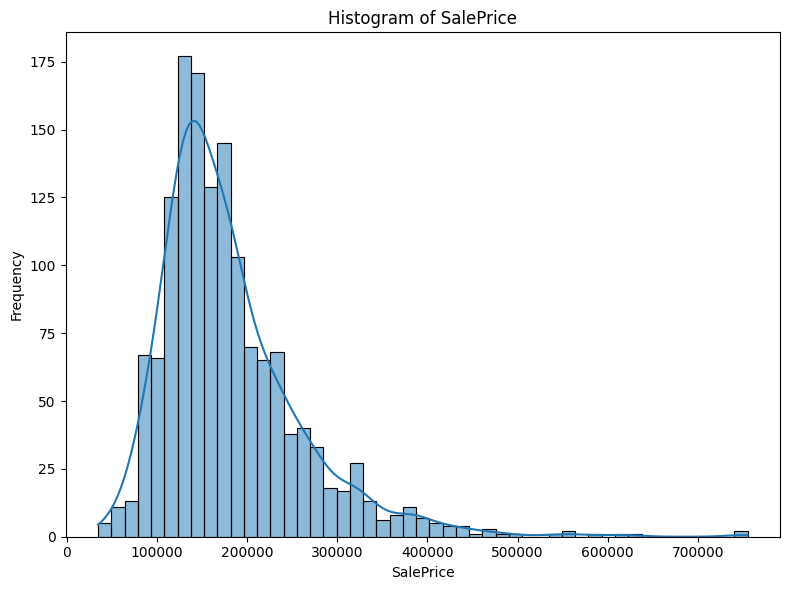

In [45]:
# Select the numerical feature for visualization
selected_numerical_feature = 'SalePrice'

# Create a histogram for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned[selected_numerical_feature], kde=True)
plt.title(f'Histogram of {selected_numerical_feature}')
plt.xlabel(selected_numerical_feature)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Correlogram

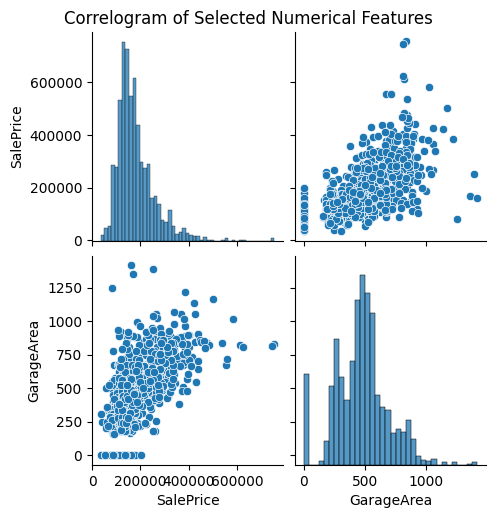

In [42]:
# Select a few numerical features for the correlogram
selected_numerical_features_corr = ['SalePrice', 'GarageArea']

# Create a correlogram (pair plot)
sns.pairplot(df_cleaned[selected_numerical_features_corr])
plt.suptitle('Correlogram of Selected Numerical Features', y=1.02)
plt.show()

### Visualize categorical features
### Bar Chart



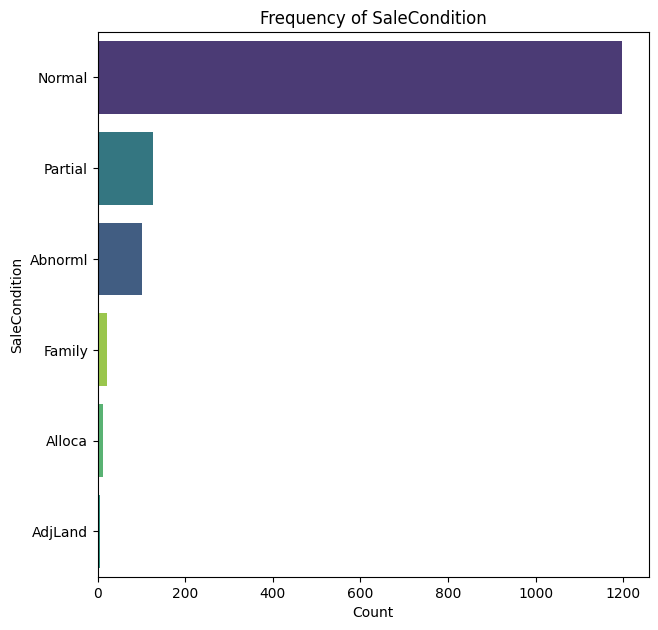

In [30]:
# Select a few relevant categorical features for visualization
selected_categorical_features = ['SaleCondition']

# Create bar charts for the selected categorical features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(y=df_cleaned[feature], order=df_cleaned[feature].value_counts().index, palette='viridis', hue=df_cleaned[feature], legend=False)
    plt.title(f'Frequency of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Grouped bar chart

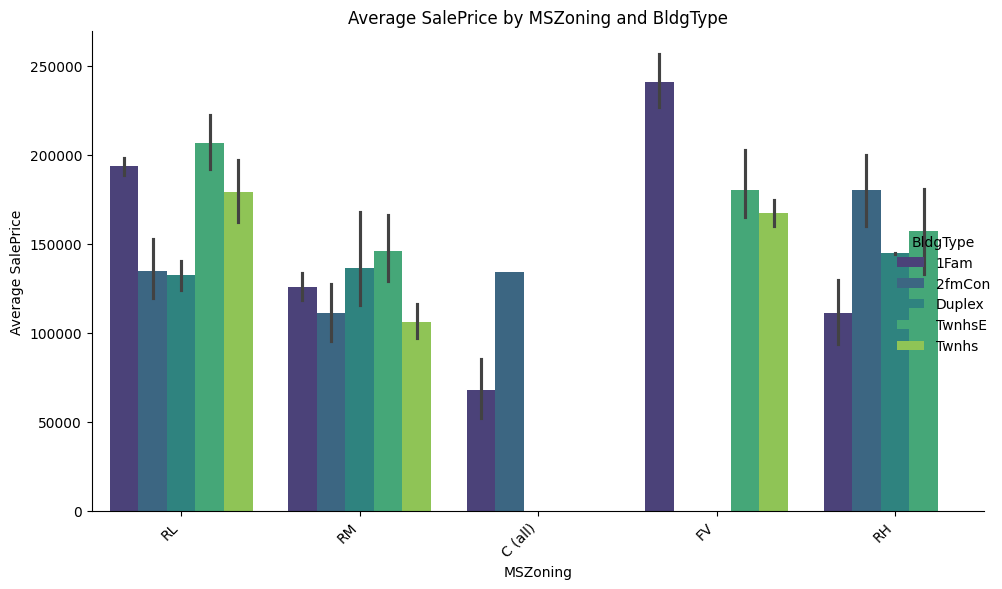

In [37]:
# Select two categorical features for the grouped bar chart
categorical_feature_group = 'MSZoning'
categorical_feature_color = 'BldgType'

# Create a grouped bar chart using catplot
sns.catplot(x=categorical_feature_group, y='SalePrice', hue=categorical_feature_color, data=df_cleaned, kind='bar', palette='viridis', height=6, aspect=1.5)
plt.title(f'Average SalePrice by {categorical_feature_group} and {categorical_feature_color}')
plt.xlabel(categorical_feature_group)
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Create stacked bar charts to visualize the distribution of a categorical feature within different categories of another categorical feature.

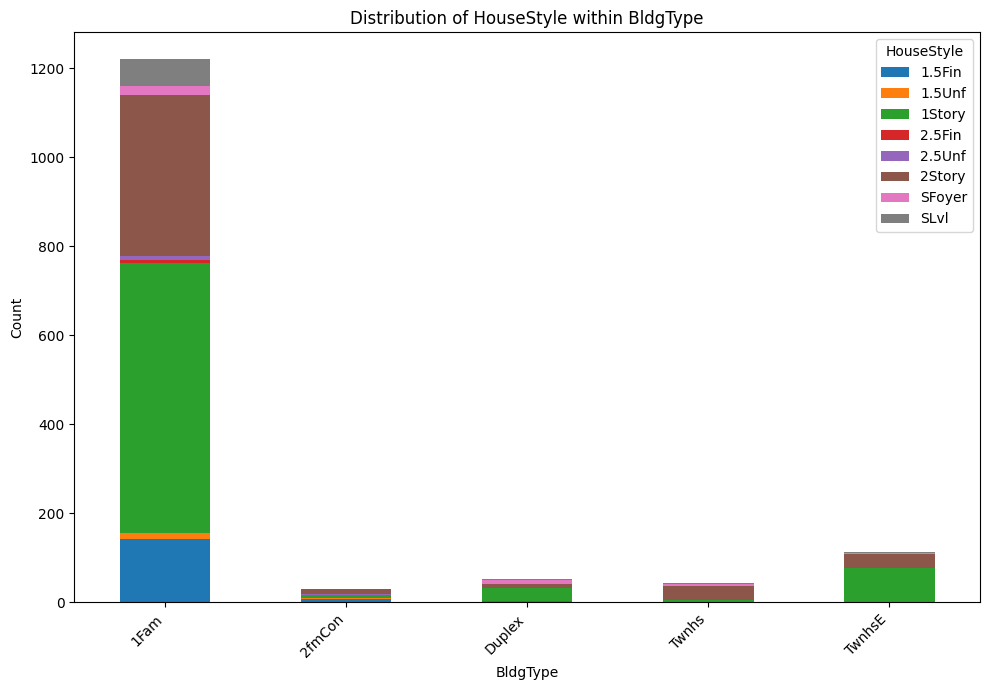

In [33]:
# Select two categorical features for a stacked bar chart
categorical_feature1 = 'BldgType'
categorical_feature2 = 'HouseStyle'

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cleaned[categorical_feature1], df_cleaned[categorical_feature2])

# Create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title(f'Distribution of {categorical_feature2} within {categorical_feature1}')
plt.xlabel(categorical_feature1)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title=categorical_feature2)
plt.tight_layout()
plt.show()

### Density plots



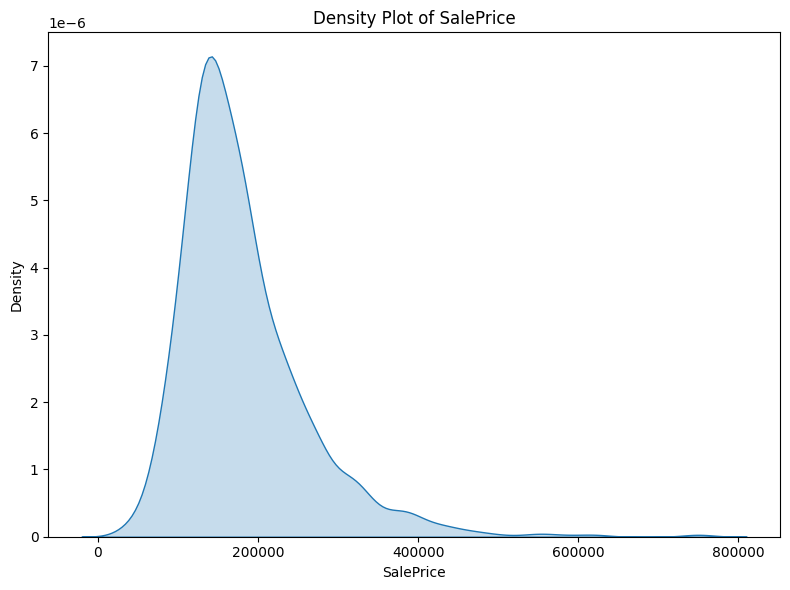

In [17]:
# Create a density plot for SalePrice
plt.figure(figsize=(8, 6))
sns.kdeplot(df_cleaned['SalePrice'], fill=True)
plt.title('Density Plot of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Box plot



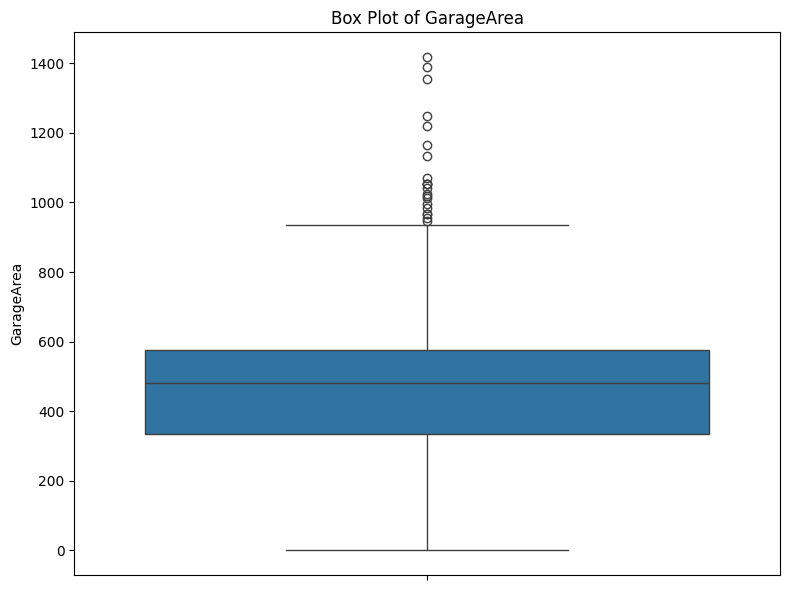

In [48]:
# Select a few numerical features for visualization
selected_numerical_features = ['GarageArea']

# Create box plots for selected numerical features
plt.figure(figsize=(8, 6))
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(1, len(selected_numerical_features), i + 1)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

### Violin plot



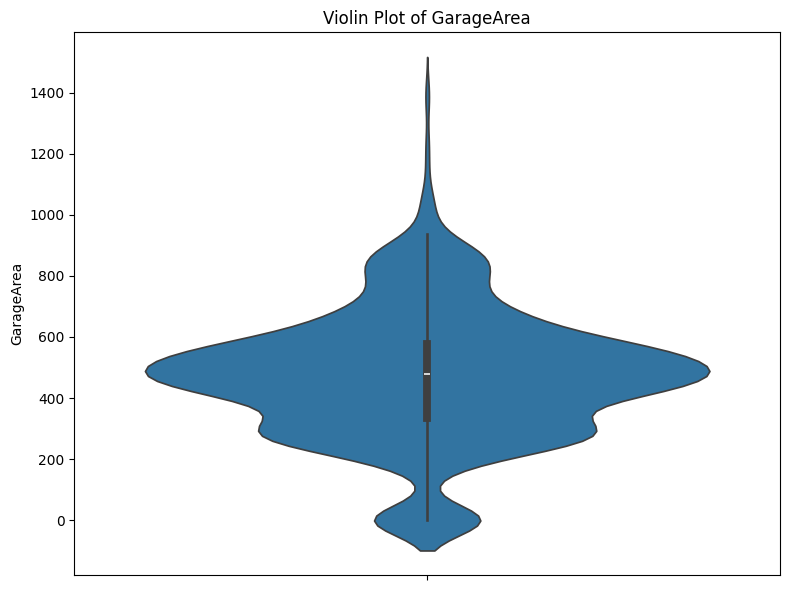

In [50]:
# Select a few numerical features for visualization
selected_numerical_features = ['GarageArea']

# Create violin plots for selected numerical features
plt.figure(figsize=(8, 6))
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(1, len(selected_numerical_features), i + 1)
    sns.violinplot(y=df_cleaned[feature])
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

### Scatter plot


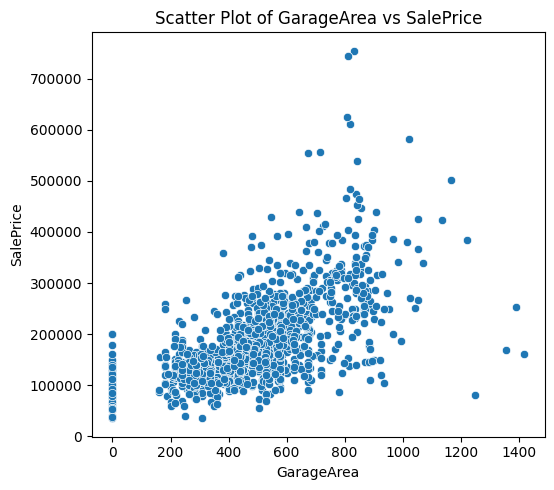

In [24]:
# Create scatter plots to examine relationships with 'SalePrice'
features_to_scatter = ['GarageArea']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['SalePrice'])
    plt.title(f'Scatter Plot of {feature} vs SalePrice')
plt.tight_layout()
plt.show()

### Heatmap



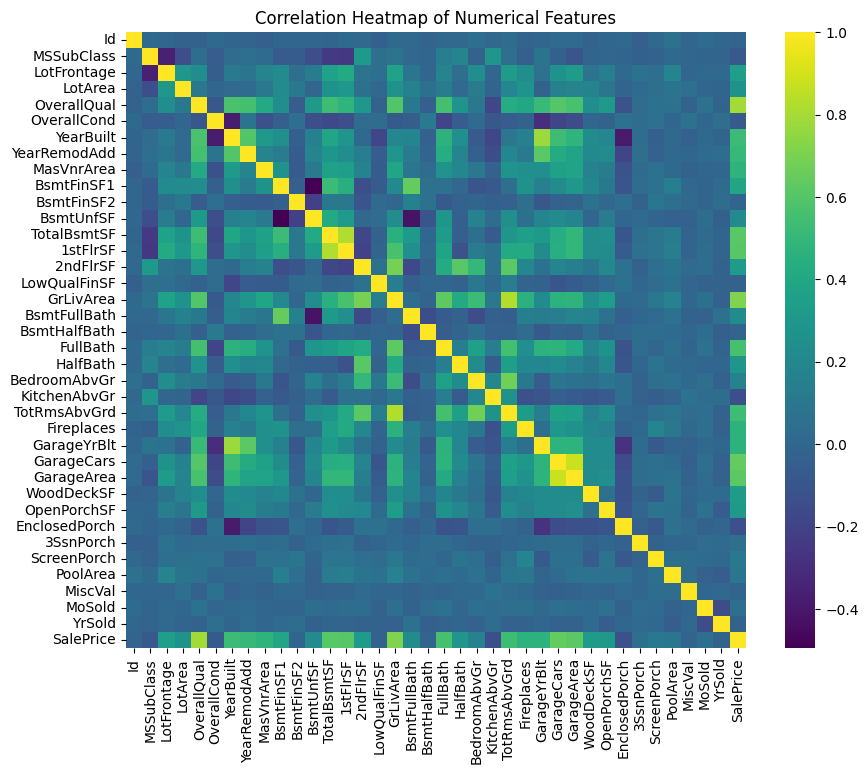

In [52]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False) # annot=True can be used for smaller matrices
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Interpret charts

### Subtask:
Add markdown cells to interpret each generated chart.


### Interpretation of Charts

Here's an interpretation of the various charts we've generated:

**Histograms and Density Plots:**

*   **SalePrice:** The distribution is right-skewed, meaning most houses sell at lower prices with fewer high-priced outliers. The density plot confirms this shape.
*   **LotFrontage:** Also right-skewed, indicating many properties have smaller street frontages, with a few having very large ones.
*   **LotArea:** Highly right-skewed with significant outliers, showing a concentration of smaller lots and some exceptionally large ones.
*   **GrLivArea:** Shows a slight right skew but is more symmetrical than LotArea or LotFrontage.
*   **GarageArea:** Right-skewed with a large peak at zero, representing properties without garages, and a tail for larger garage areas.

**Box Plots and Violin Plots:**

*   **SalePrice:** The box plot shows the median SalePrice and the spread of the middle 50% of prices, with many high-value outliers. The violin plot shows the distribution shape, reinforcing the right skew and outliers.
*   **LotFrontage:** Reveals a median around 70 and many outliers with large frontages.
*   **LotArea:** Clearly shows numerous extreme outliers with very large lot sizes.
*   **GrLivArea:** Shows a moderate spread and some outliers with large living areas.
*   **GarageArea:** Highlights the concentration at zero (no garage) and outliers with large garage areas.

**Scatter Plots (vs SalePrice):**

*   **LotArea vs SalePrice:** A weak positive relationship. Larger lots tend to have higher prices, but there's a lot of variation, especially at smaller lot sizes.
*   **GrLivArea vs SalePrice:** A strong positive linear relationship. Larger living areas are strongly associated with higher sale prices.
*   **GarageArea vs SalePrice:** A moderately strong positive linear relationship. Larger garage areas generally correlate with higher sale prices, with properties without garages (GarageArea = 0) having lower prices.

**Correlation Heatmap:**

*   Shows the pairwise correlations between numerical features.
*   **Strong Positive Correlations with SalePrice:** 'OverallQual' (strongest), 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'. These features are good potential predictors of SalePrice.
*   **Weak or Negative Correlations with SalePrice:** Most other numerical features have weak or slightly negative correlations.

**Bar Charts (Categorical Feature Frequencies):**

*   **SaleCondition:** Shows that 'Normal' is the most frequent sale condition, followed by 'Partial' and 'Abnorml'.

**Grouped Bar Chart (Average SalePrice by MSZoning and BldgType):**

*   This chart allows us to compare the average SalePrice for different building types within each zoning category. For example, within the 'RL' zoning, single-family homes ('1Fam') have a higher average SalePrice than duplexes ('Duplex'). It also shows that certain zoning types ('FV', 'RL') generally have higher average sale prices across building types compared to others ('RM', 'C (all)').

**Stacked Bar Chart (Distribution of HouseStyle within BldgType):**

*   This chart shows the proportion of different house styles within each building type. For instance, for '1Fam' buildings, '1Story' and '2Story' are the most common house styles, while other building types have different distributions of house styles.